<h1>Baxter Intro Assignment</h1>

Author:Zhiqi Li

<h3>Part1.1: ROS Core Topics</h3>

/robot/joint_states: The names, velocities, positions and effort on every joint. It is important because we track the condition of the real robot based on these data. And we design the movement of the robot based on these data.

/robot/state: Enabled: whether the Baxter is used, stopped: whether the robot is stopped, error: whether there is error, estop_button: whether the emergence stop button is pushed, estop_source: where is the emergence stop coming from. It is important because only with (enabled:True stopped:False error:False) we know when the Baxter can normally react to the command.

/gazebo/model_states: The name, positions and orientations of every model in the Baxter world. It is important because we track the position and movement of models in Baxter world with these data.

/rosout: It contains every message of ROS_INFO(), ROS_WARN(), ROS_ERROR(). It is important because once the robot system crashed we might try to debug with the imformation here.

/tf: It contains the transformation of coordinates in the system. It is important because the visualization of models/coordinates/paths in RViz must based on it. 

<h3>Part1.2: Understanding TF Frames</h3>

I assume that left_gripper and right_gripper is tranforming and mapping from base (grandgrand...child of base). From the flowchart I got, I can only see the relation between base and arm_mount, and the relation between wrist and gripper. There is nothing in the middle to connect them. I looked up for it and found that the arm_mount is the point the torso connect with the shoulder, the wrist is linking the elbow and the hand. I can understand it physically why TF frames is a tree now, and assume that arm_mount can link to wrist with some other unknown nodes in the middle. So I assume that left_gripper and right_gripper are the very end children of base.

<h3>Part2: Python Programming for Baxter</h3>

In [ ]:
import rospy
import baxter_interface

rospy.init_node('baxter_test')
limb = baxter_interface.Limb('left')

#set to neutral
limb.move_to_neutral()
rospy.sleep(1.0)

#rotate the shoulder
joint1 = limb.joint_angles()
joint1['left_s0'] += 0.3
limb.move_to_joint_positions(joint1)
rospy.sleep(1.0)

#roll elbow
joint2 = dict(joint1)
joint2['left_e0'] += 0.3
limb.move_to_joint_positions(joint2)
rospy.sleep(1.0)

#twist wrist
joint3 = dict(joint2)
joint3['left_w0'] += 0.3
limb.move_to_joint_positions(joint3)
rospy.sleep(1.0)

<h3>Required screen shot</h3>

Matplotlib is building the font cache; this may take a moment.


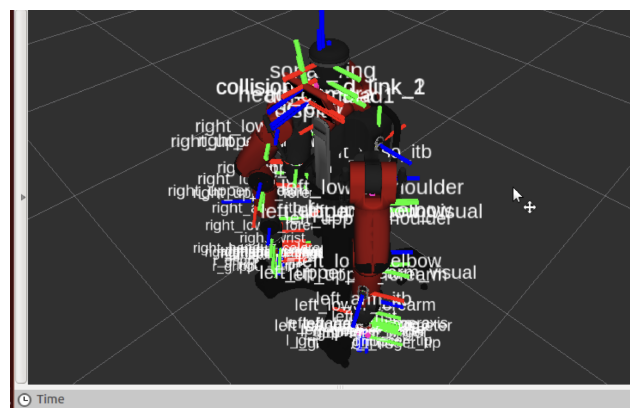

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('rviz.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

<h4>Additional screen shots</h4>

When using rostopic list:

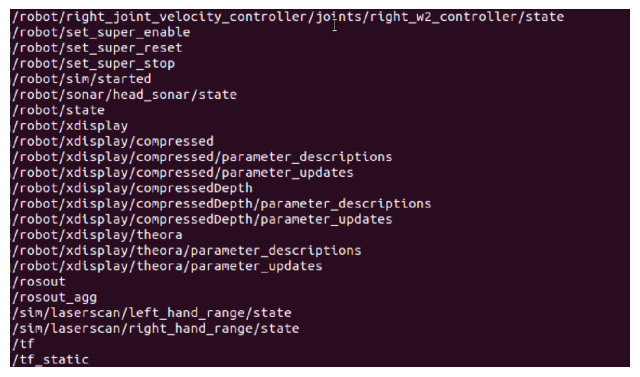

In [7]:
img = mpimg.imread('topics.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

The TF tree:

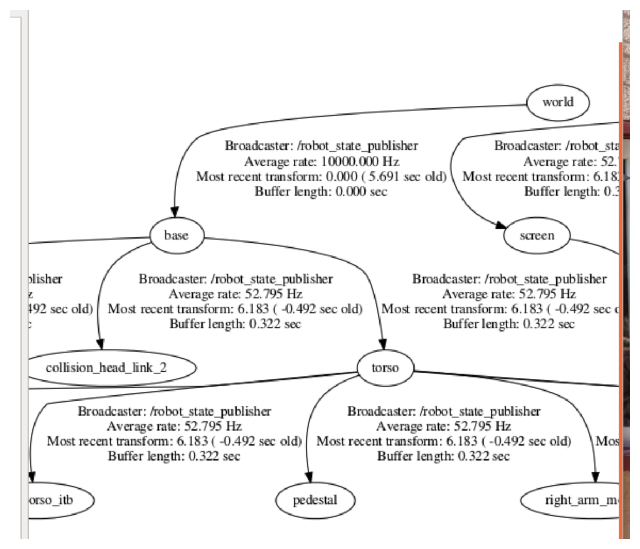

In [9]:
img = mpimg.imread('TF1.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

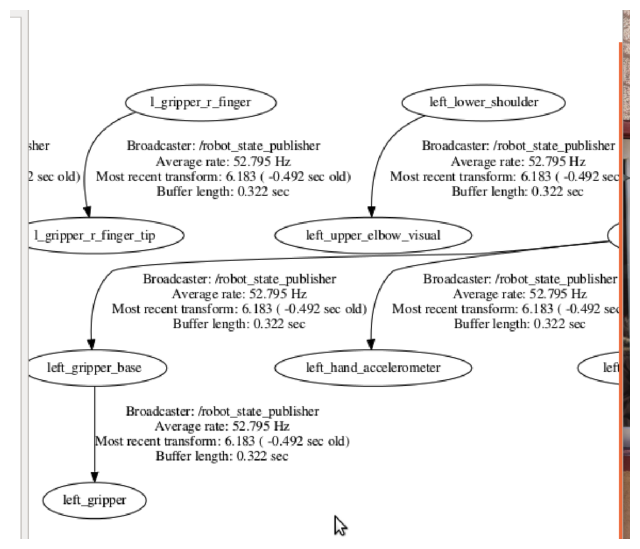

In [10]:
img = mpimg.imread('TF2.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

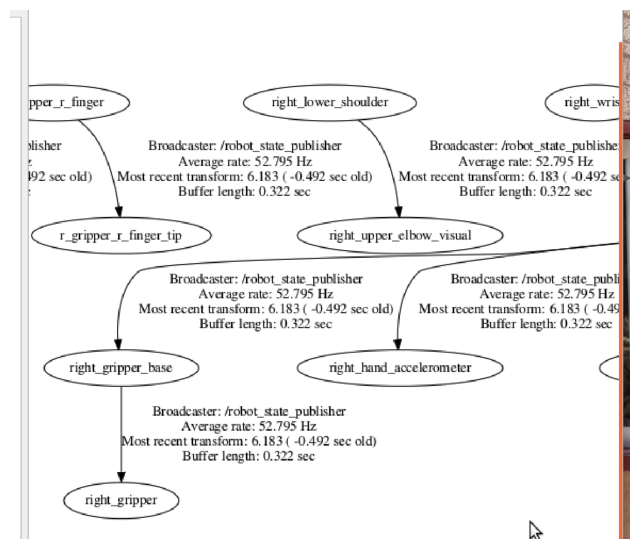

In [12]:
img = mpimg.imread('TF4.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()